<a href="https://colab.research.google.com/github/Gops-8/Kaggle_credit_fraud_detection/blob/master/Credit_Card_Fraud_Detection_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Exploratory data analysis

In [3]:
df = pd.read_csv('/content/drive/My Drive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observe the different feature type present in the data
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [4]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('Normal Tran:',round(normal_share,2),'Fraud Tran:',round(fraud_share,2))

Normal Tran: 99.83 Fraud Tran: 0.17


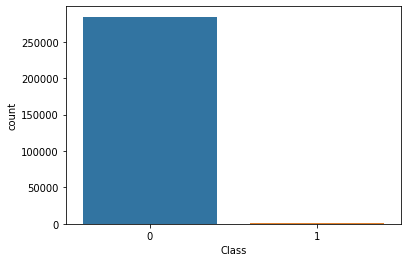

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

# df['Class'].value_counts().plot(kind = 'bar')
sns.countplot(df['Class'])

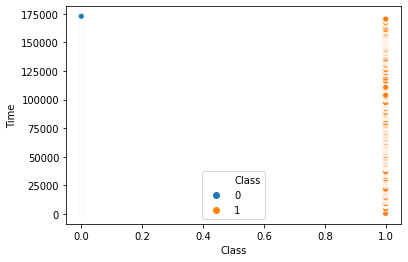

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(y=df.Time, x=df.Class, hue=df.Class)

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df.Amount, y=df.Class, hue=df.Class)

In [5]:
# Drop unnecessary columns
df.drop('Time', axis=1,inplace=True)
df_copy = df.copy()

### Splitting the data into train & test data

In [4]:
y= df.Class #class variable

X = df.drop('Class', axis=1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size = 0.2, stratify = y, random_state = 42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [8]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

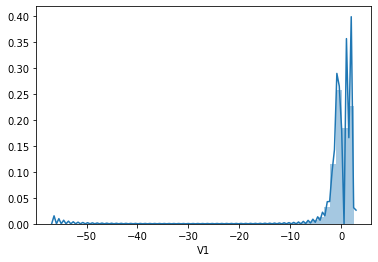

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
sns.distplot(df.V1)

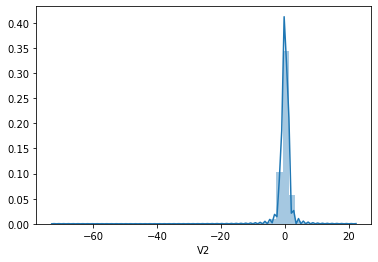

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
sns.distplot(df.V2)

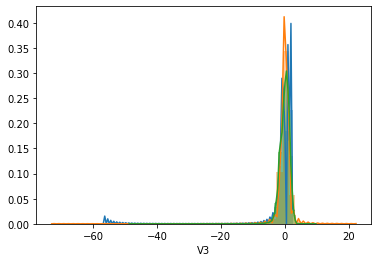

In [ ]:
fet=['V1','V2','V3']
for i in fet:
  sns.distplot(df[i])

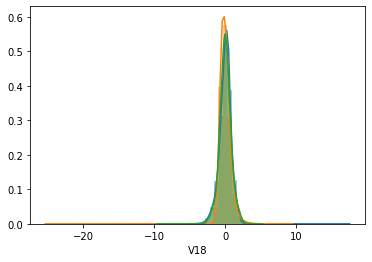

In [ ]:
fet=['V16','V17','V18']
for i in fet:
  sns.distplot(df[i])

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [6]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy = False)
pt.fit_transform(X_train)
pt.transform(X_test)

array([[ 1.31955856, -0.61288813,  0.93892143, ...,  1.34655918,
         0.90174064,  0.05186023],
       [-1.6867346 , -1.41712554, -1.60749426, ...,  0.26554023,
        -1.61758136, -0.3313538 ],
       [-0.06911144, -1.64001772,  1.68180883, ...,  1.39473137,
         1.55683516,  0.7396992 ],
       ...,
       [ 1.41483664, -0.77810278,  0.38991693, ...,  0.03145836,
         0.45694778, -0.14443423],
       [ 1.37399504,  1.5544267 , -0.73306365, ..., -0.01816468,
        -0.16735633, -0.03061232],
       [-0.88451739,  0.657678  , -0.4577096 , ...,  0.05004144,
         0.16487523,  0.60371697]])

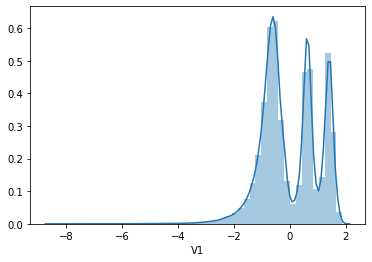

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
sns.distplot(X_train.V1)

## Model Building
- Build different models on the imbalanced dataset and see the result


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Forest 





In [ ]:
#perform cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=3)
param_grid = {'max_depth': [1,2,4,8,10],
          'n_estimators': [100,200, 300]}
folds = 5
RF = RandomForestClassifier()
i=1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]

    # specify model
    RF = RandomForestClassifier(n_jobs=-1)  

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = RF, 
                            param_grid = param_grid, 
                            scoring= 'roc_auc', 
                            cv = StratifiedKFold(), 
                            verbose = 2,
                            n_jobs=-1,
                            return_train_score=True)  
    
    model_cv.fit(X_train_cv, y_train_cv)
    i+=1

#print the evaluation result by choosing a evaluation metric

y_pred = model_cv.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))

#print the optimum value of hyperparameters

print(model_cv.best_params_)

1 of KFold 3
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 68.4min finished


2 of KFold 3
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 68.6min finished


3 of KFold 3
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 65.4min finished


0.8931033916842956
{'max_depth': 10, 'n_estimators': 100}


In [ ]:
#perform cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=3)
param_grid = {'max_depth': [10,12,15],
          'n_estimators': [50,70,100]}
folds = 5

i=1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]

    # specify model
    RF = RandomForestClassifier(n_jobs=-1)  

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = RF, 
                          param_grid = param_grid, 
                          scoring= 'roc_auc', 
                          cv = StratifiedKFold(n_splits=5, shuffle=True), 
                          verbose = 2,
                          n_jobs=-1,
                          return_train_score=True)   
    
    model_cv.fit(X_train_cv, y_train_cv)
    i+=1

#print the evaluation result by choosing a evaluation metric

y_pred = model_cv.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))

#print the optimum value of hyperparameters

print(model_cv.best_params_)

1 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 37.3min finished


2 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 36.7min finished


3 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 37.4min finished


0.8969267804044431
{'max_depth': 12, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
clf = RandomForestClassifier(n_jobs=-1,max_depth=12,n_estimators=100)  
clf.fit(X_train, y_train)
y_pred_un = clf.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_un[:,1])) #print the evaluation score on the X_test by choosing the best evaluation metric

0.975681683759604


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 12


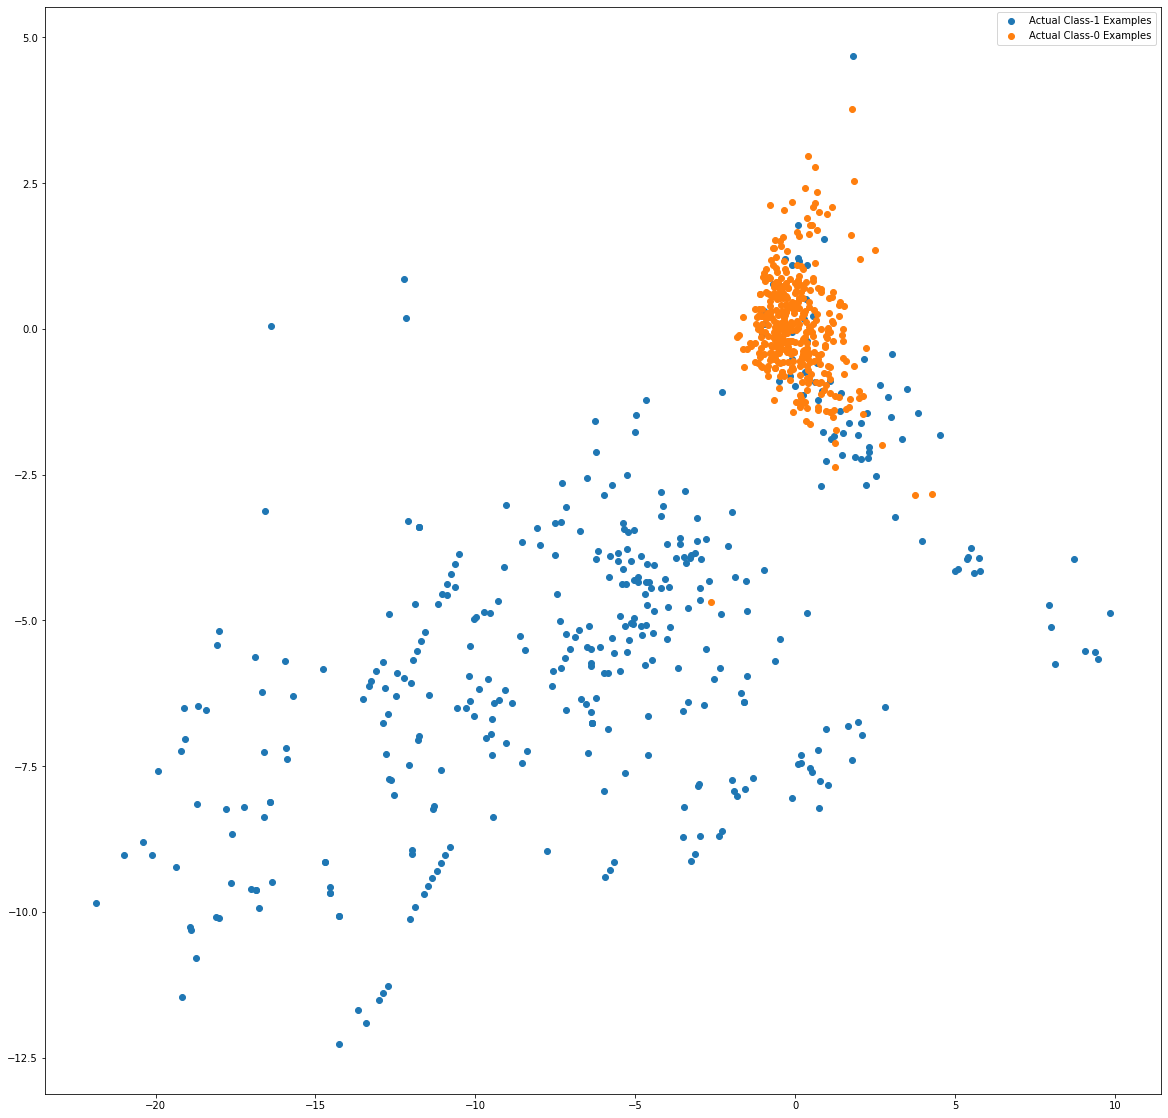

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [7]:
from imblearn import over_sampling     #- import the packages

## We are using Gridserach CV to check accuracy accross below combination and we will be building  our final model on the best found parm
## we will be checking performance on maxdept 4 8 and 10 and estimators of 100 , 200 & 300 

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=3)
param_grid = {'max_depth': [4,8,10],
          'n_estimators': [100,200, 300]}
folds = 5
i=1
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]

    # specify model
    RF = RandomForestClassifier(n_jobs=-1,class_weight='balanced')  

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = RF, 
                            param_grid = param_grid, 
                            scoring= 'roc_auc', 
                            cv = StratifiedKFold(n_splits=5, shuffle=True), 
                            verbose = 2,
                            n_jobs=-1,
                            return_train_score=True)  
    
    model_cv.fit(X_train_cv, y_train_cv)
    i+=1

#print the evaluation result by choosing a evaluation metric

y_pred = model_cv.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))

#print the optimum value of hyperparameters

print(model_cv.best_params_)



1 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 36.1min finished


2 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 36.7min finished


3 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 37.4min finished


0.9331030815763992
{'max_depth': 4, 'n_estimators': 200}


In [8]:
clf1 = RandomForestClassifier(n_jobs=-1,max_depth=4,n_estimators=200,class_weight='balanced')  
clf1.fit(X_train, y_train)
y_pred_un = clf1.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_un[:,1])) #print the evaluation score on the X_test by choosing the best evaluation metric

0.9740935766540718


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

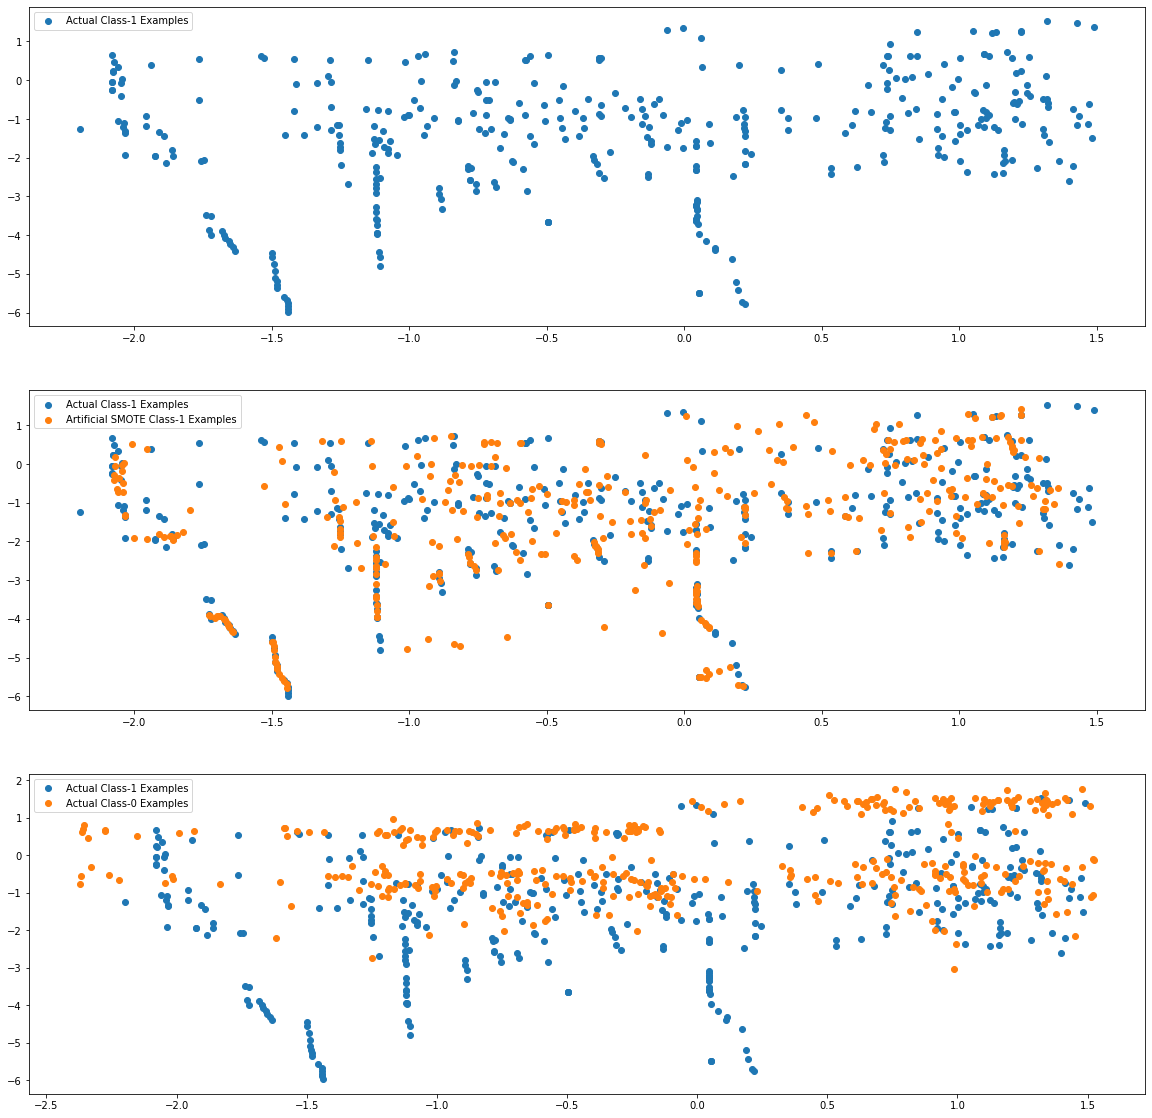

In [11]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [1]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
param_grid = {'max_depth': [4,8,10],
          'n_estimators': [100,200, 300]}
folds = 5
i=1
#perform hyperparameter tuning
for train_index,test_index in skf.split(X_train_smote,y_train_smote):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train_smote[train_index],X_train_smote[test_index]
    y_train_cv,y_test_cv = y_train_smote[train_index],y_train_smote[test_index]

    # specify model
    RF = RandomForestClassifier(n_jobs=-1)  

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = RF, 
                            param_grid = param_grid, 
                            scoring= 'roc_auc', 
                            cv = StratifiedKFold(n_splits=5, shuffle=True), 
                            verbose = 2,
                            n_jobs=-1,
                            return_train_score=True)  
    
    model_cv.fit(X_train_cv, y_train_cv)
    i+=1

#print the evaluation result by choosing a evaluation metric

y_pred = model_cv.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))

#print the optimum value of hyperparameters

print(model_cv.best_params_)


#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


NameError: ignored

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

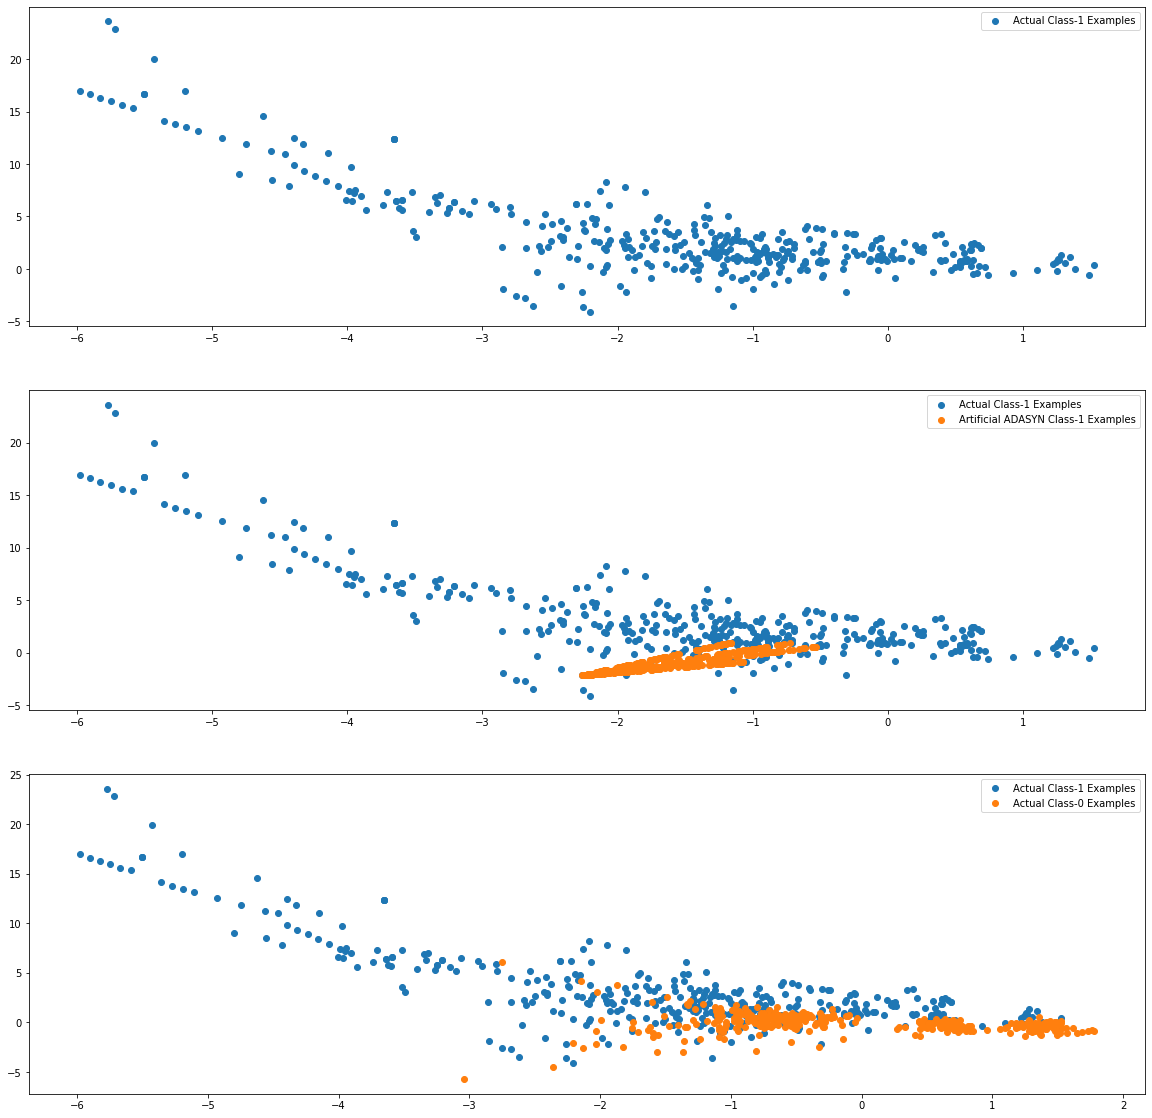

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)